<a href="https://colab.research.google.com/github/askewai/ML_challenge/blob/main/d9-wineEquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data source: UCI (DOI: 10.24432/C56S3T)

The "Wine Quality" dataset, donated on 10/6/2009, includes two datasets related to red and white vinho verde wine samples from northern Portugal. The goal is to model wine quality based on physicochemical tests, as outlined in [Cortez et al., 2009]. This multivariate dataset, containing 4,898 instances and 11 features, is suitable for classification or regression tasks in the business domain. The datasets focus on physicochemical inputs and sensory outputs, excluding details like grape types or wine brands. With no missing values, the dataset is ideal for exploring feature selection methods and outlier detection, particularly given the imbalance in wine quality classes. For more information, refer to the introductory paper by Cortez et al., published in *Decision Support Systems*.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.concat([X, y], axis=1)

# EDA

In [5]:
df.head(15)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.nunique()

,0
fixed_acidity,106
volatile_acidity,187
citric_acid,89
residual_sugar,316
chlorides,214
free_sulfur_dioxide,135
total_sulfur_dioxide,276
density,998
pH,108
sulphates,111


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [8]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


<Figure size 1200x800 with 0 Axes>

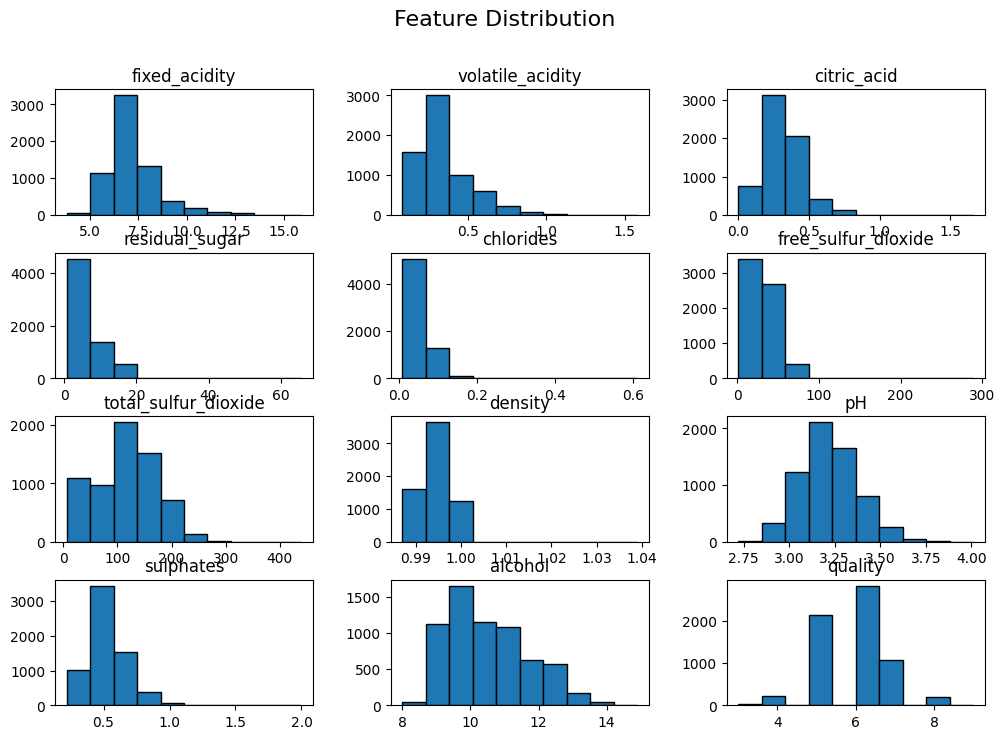

In [10]:
plt.figure(figsize=(12, 8))
df.hist(bins=10, figsize=(12, 8), grid=False, edgecolor='black')
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

<ipython-input-11-58e9d8d452d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette=sns.color_palette("Set2", 7))


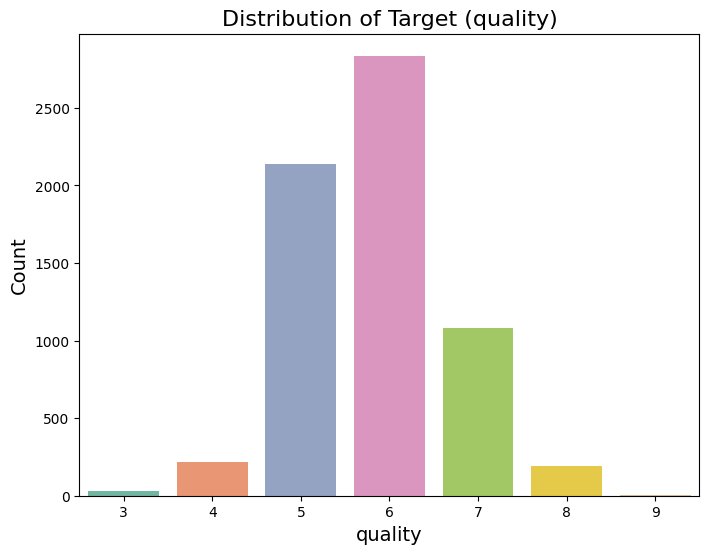

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette=sns.color_palette("Set2", 7))
plt.title('Distribution of Target (quality)', fontsize=16)
plt.xlabel('quality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

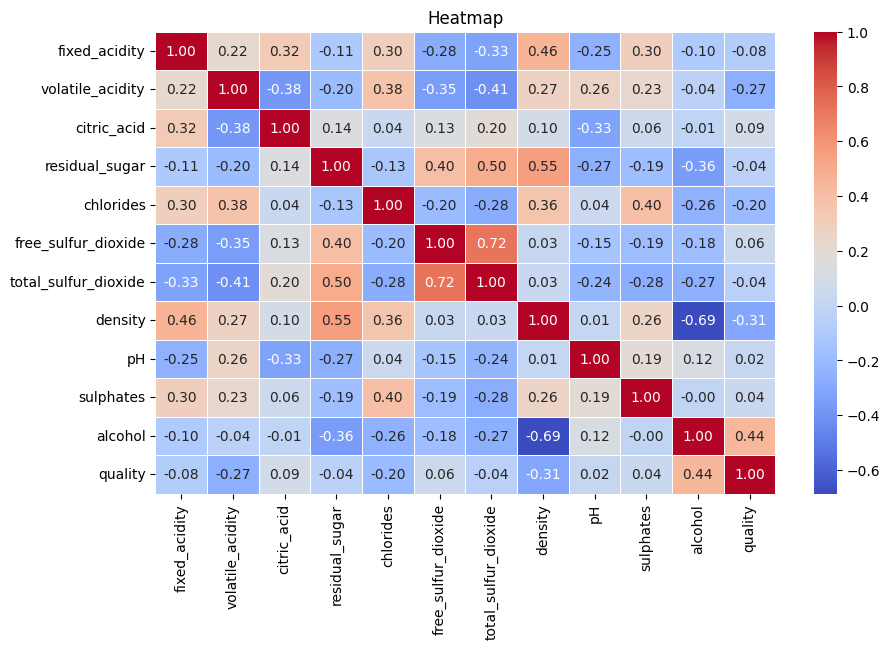

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap")
plt.show()

In [13]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

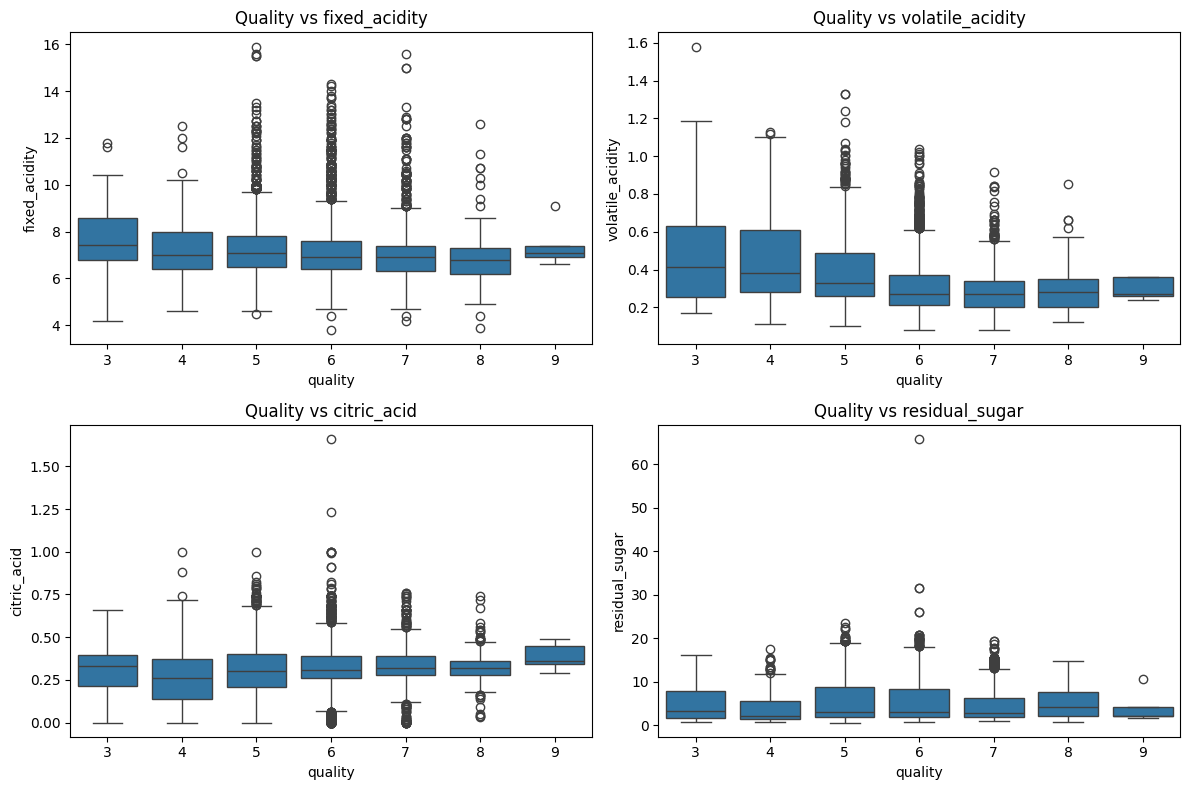

In [14]:
plt.figure(figsize=(12, 8))
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="quality", y=feature, data=df)
    plt.title(f"Quality vs {feature}")
plt.tight_layout()
plt.show()

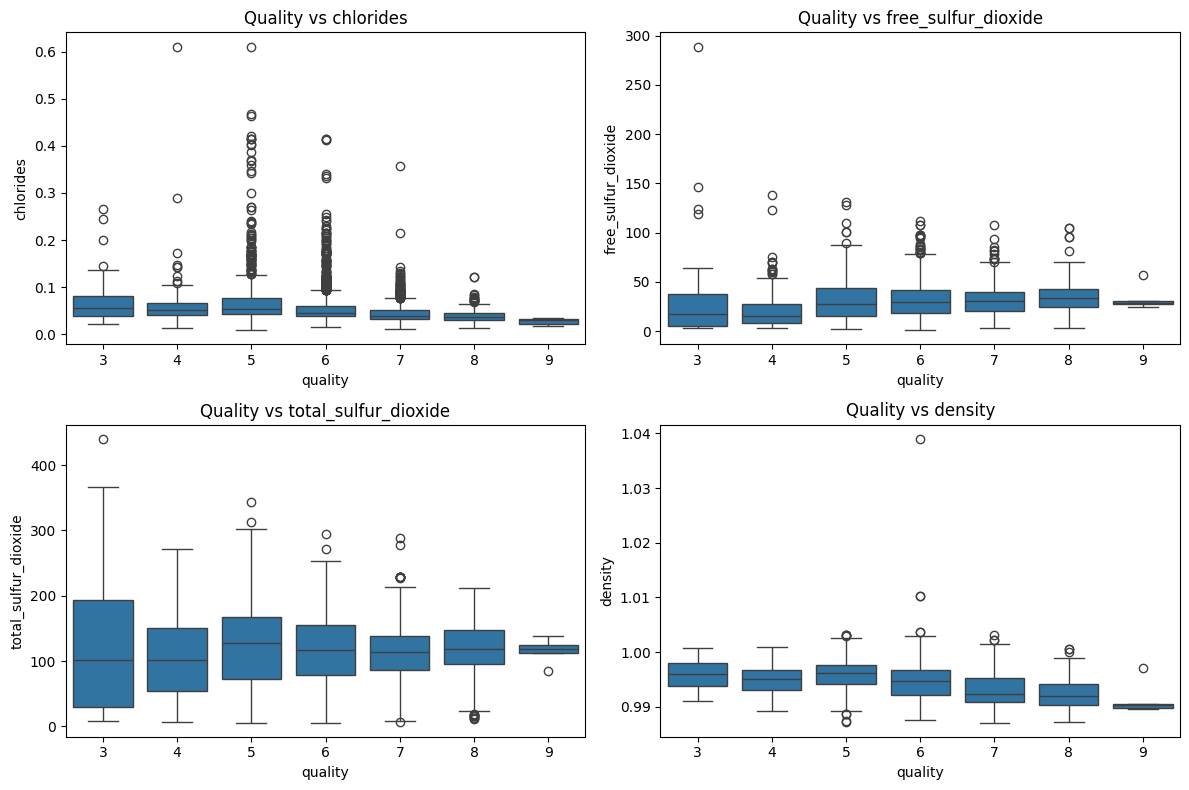

In [15]:
plt.figure(figsize=(12, 8))
features = ['chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="quality", y=feature, data=df)
    plt.title(f"Quality vs {feature}")
plt.tight_layout()
plt.show()

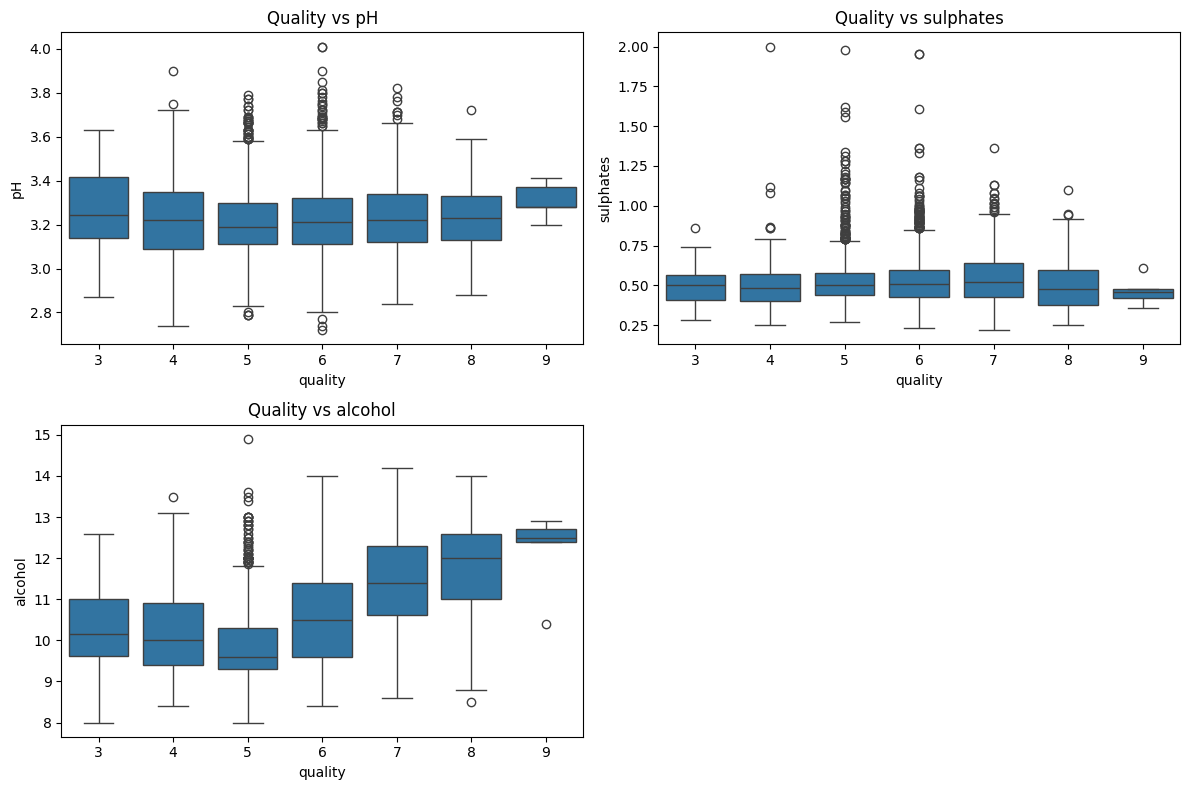

In [16]:
plt.figure(figsize=(12, 8))
features = ['pH', 'sulphates', 'alcohol']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="quality", y=feature, data=df)
    plt.title(f"Quality vs {feature}")
plt.tight_layout()
plt.show()

preprocessing

In [17]:
X = df.drop(columns=['quality'])
y = df[['quality']]

In [18]:
y = y - y.min()

In [19]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_filtered = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]
y_filtered = y.loc[X_filtered.index]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.2, random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE
min_samples = min(y_train.value_counts())
k_neighbors = min(5, min_samples - 1) if min_samples > 1 else 1

smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

modelling

In [23]:
pip install catboost

In [24]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42, verbose=0)  # Tanpa output verbose
}

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


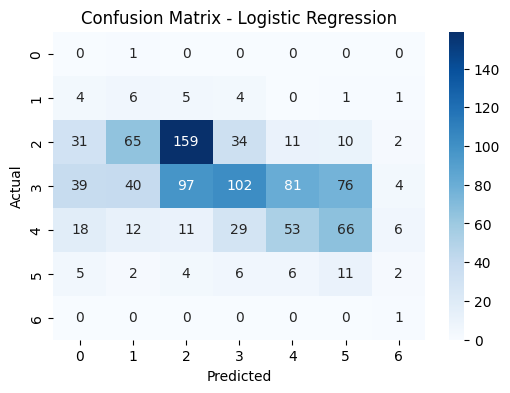

Classification Report - Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.05      0.29      0.08        21
           2       0.58      0.51      0.54       312
           3       0.58      0.23      0.33       439
           4       0.35      0.27      0.31       195
           5       0.07      0.31      0.11        36
           6       0.06      1.00      0.12         1

    accuracy                           0.33      1005
   macro avg       0.24      0.37      0.21      1005
weighted avg       0.51      0.33      0.38      1005

--------------------------------------------------------------------------------


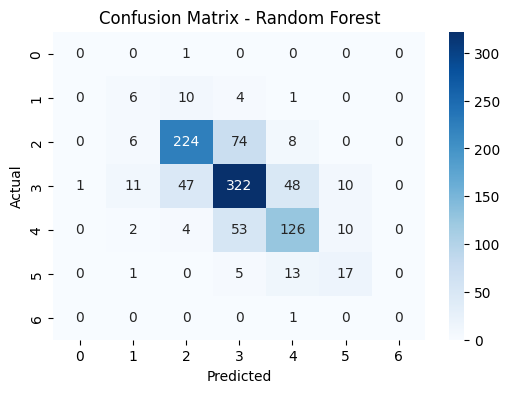

Classification Report - Random Forest

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.23      0.29      0.26        21
           2       0.78      0.72      0.75       312
           3       0.70      0.73      0.72       439
           4       0.64      0.65      0.64       195
           5       0.46      0.47      0.47        36
           6       0.00      0.00      0.00         1

    accuracy                           0.69      1005
   macro avg       0.40      0.41      0.40      1005
weighted avg       0.70      0.69      0.69      1005

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


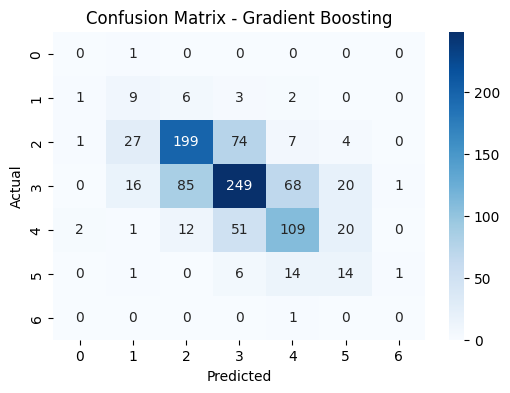

Classification Report - Gradient Boosting

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.16      0.43      0.24        21
           2       0.66      0.64      0.65       312
           3       0.65      0.57      0.61       439
           4       0.54      0.56      0.55       195
           5       0.24      0.39      0.30        36
           6       0.00      0.00      0.00         1

    accuracy                           0.58      1005
   macro avg       0.32      0.37      0.33      1005
weighted avg       0.61      0.58      0.59      1005

--------------------------------------------------------------------------------


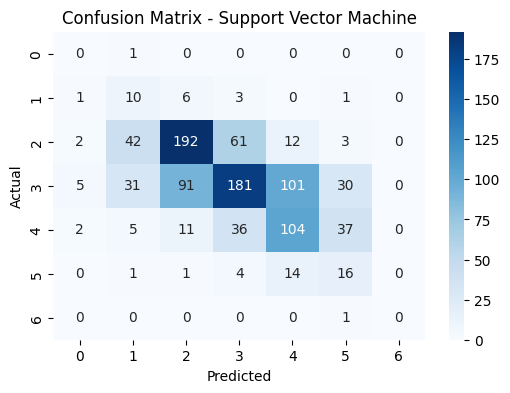

Classification Report - Support Vector Machine

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.11      0.48      0.18        21
           2       0.64      0.62      0.63       312
           3       0.64      0.41      0.50       439
           4       0.45      0.53      0.49       195
           5       0.18      0.44      0.26        36
           6       0.00      0.00      0.00         1

    accuracy                           0.50      1005
   macro avg       0.29      0.35      0.29      1005
weighted avg       0.57      0.50      0.52      1005

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


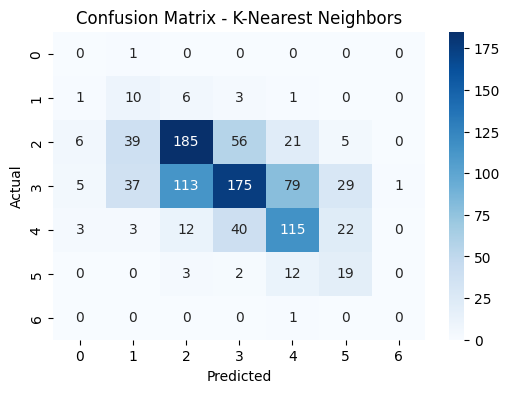

Classification Report - K-Nearest Neighbors

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.11      0.48      0.18        21
           2       0.58      0.59      0.59       312
           3       0.63      0.40      0.49       439
           4       0.50      0.59      0.54       195
           5       0.25      0.53      0.34        36
           6       0.00      0.00      0.00         1

    accuracy                           0.50      1005
   macro avg       0.30      0.37      0.31      1005
weighted avg       0.57      0.50      0.52      1005

--------------------------------------------------------------------------------


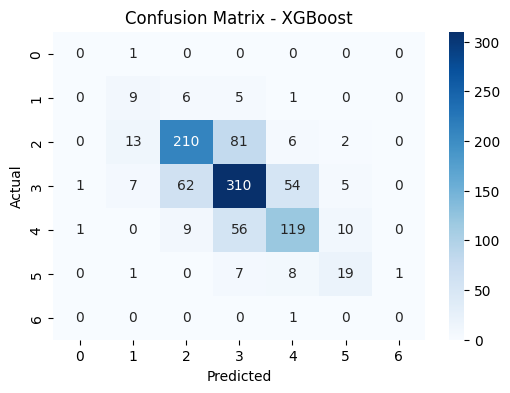

Classification Report - XGBoost

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.43      0.35        21
           2       0.73      0.67      0.70       312
           3       0.68      0.71      0.69       439
           4       0.63      0.61      0.62       195
           5       0.53      0.53      0.53        36
           6       0.00      0.00      0.00         1

    accuracy                           0.66      1005
   macro avg       0.41      0.42      0.41      1005
weighted avg       0.67      0.66      0.67      1005

--------------------------------------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 12761, number of used features: 11


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


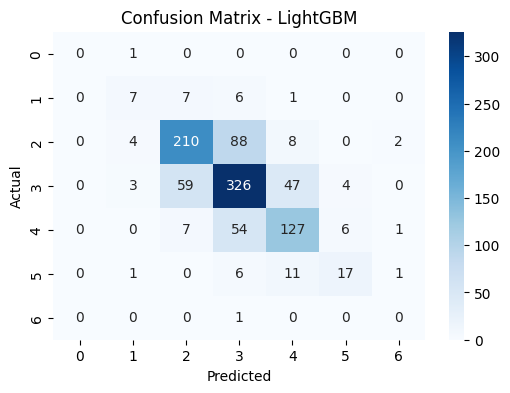

Classification Report - LightGBM

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.44      0.33      0.38        21
           2       0.74      0.67      0.71       312
           3       0.68      0.74      0.71       439
           4       0.65      0.65      0.65       195
           5       0.63      0.47      0.54        36
           6       0.00      0.00      0.00         1

    accuracy                           0.68      1005
   macro avg       0.45      0.41      0.43      1005
weighted avg       0.69      0.68      0.68      1005

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


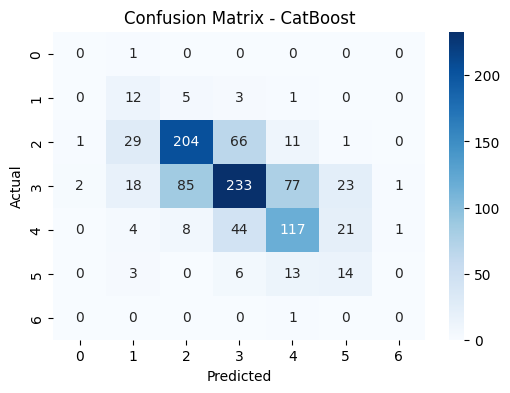

Classification Report - CatBoost

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.18      0.57      0.27        21
           2       0.68      0.65      0.66       312
           3       0.66      0.53      0.59       439
           4       0.53      0.60      0.56       195
           5       0.24      0.39      0.29        36
           6       0.00      0.00      0.00         1

    accuracy                           0.58      1005
   macro avg       0.33      0.39      0.34      1005
weighted avg       0.61      0.58      0.59      1005

--------------------------------------------------------------------------------


In [25]:
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote.values.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {name}\n")
    print(classification_report(y_test, y_pred))
    print("-" * 80)

In [26]:
results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"])

In [27]:
results_df

,Model,Accuracy
0,Logistic Regression,0.330348
1,Random Forest,0.691542
2,Gradient Boosting,0.577114
3,Support Vector Machine,0.500498
4,K-Nearest Neighbors,0.501493
5,XGBoost,0.663682
6,LightGBM,0.683582
7,CatBoost,0.577114


<ipython-input-28-a45d3239b0c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='pastel')


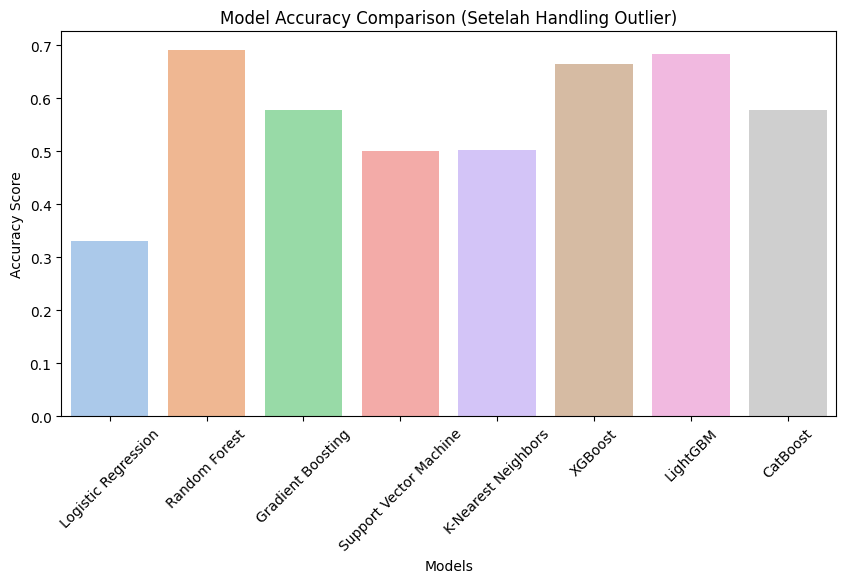

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='pastel')
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison (Setelah Handling Outlier)")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()

i very confused about this dataset. if you guys who read this, you can make a devlopment about the models.